<a href="https://colab.research.google.com/github/jrfanfan/Android_temp_con/blob/main/Copy_of_starter_bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import pandas as pd

In [173]:

df = pd.DataFrame(pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv'))
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
37065,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
37066,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
37067,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [178]:
no_term_deposit = df[df["y"]=="no"].sample(frac=0.12534615501658500958583122850796)
no_term_deposit


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
18961,47,blue-collar,married,basic.9y,unknown,yes,yes,cellular,aug,thu,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
16641,32,technician,single,professional.course,no,no,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
32049,30,admin.,single,high.school,no,yes,yes,cellular,may,mon,1,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
15131,44,blue-collar,married,basic.4y,no,yes,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
19056,30,admin.,married,university.degree,unknown,yes,no,cellular,aug,mon,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4307,56,management,married,university.degree,no,yes,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
1408,38,technician,divorced,professional.course,no,yes,no,telephone,may,thu,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
35430,62,blue-collar,married,unknown,no,no,no,cellular,mar,mon,2,999,2,failure,-1.8,93.369,-34.8,0.635,5008.7,no
8199,44,housemaid,married,basic.4y,unknown,no,no,telephone,jun,thu,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no


In [176]:
# Import the seaborn library the conventional way. Then optionally configure
# the default chart style.
import seaborn as sns
sns.set_theme(style="whitegrid")

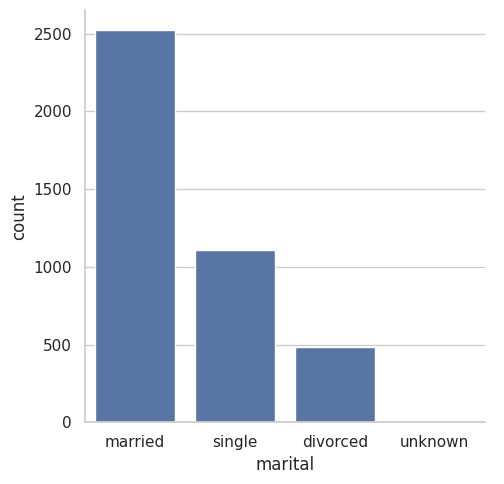

In [179]:
# Use seaborn to create a count plot comparing the count of single

sns.catplot(data=no_term_deposit, x='marital', kind='count')



In [184]:
term_deposit = df
term_deposit

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
37065,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
37066,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
37067,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


<Axes: xlabel='campaign', ylabel='pdays'>

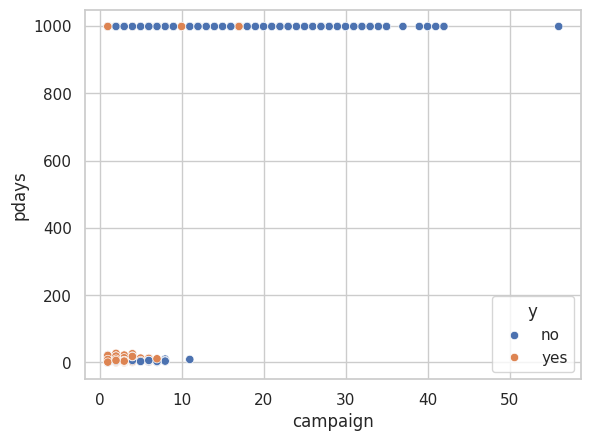

In [185]:
sns.scatterplot(data=term_deposit, x='campaign', y='pdays', hue='y')

In [232]:
features_target = df
features_target

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37064,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
37065,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
37066,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
37067,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [233]:
# Create a new dataframe called X that contians the features we're going
# to use to make predictions
X = features_target[['campaign', 'previous', 'emp.var.rate',	'cons.price.idx',	'cons.conf.idx',	'euribor3m', 'nr.employed']]
X

,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,0,1.1,93.994,-36.4,4.857,5191.0
1,1,0,1.1,93.994,-36.4,4.857,5191.0
2,1,0,1.1,93.994,-36.4,4.857,5191.0
3,1,0,1.1,93.994,-36.4,4.857,5191.0
4,1,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...
37064,1,0,-1.1,94.767,-50.8,1.028,4963.6
37065,1,0,-1.1,94.767,-50.8,1.028,4963.6
37066,2,0,-1.1,94.767,-50.8,1.028,4963.6
37067,1,0,-1.1,94.767,-50.8,1.028,4963.6


In [234]:
# Create a new dataframe called y that contians the target we're
# trying to predict
y = features_target['y']
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
37064,yes
37065,no
37066,no
37067,yes


In [235]:
# Import and use the train_test_split() function to split the X and y
# dataframes into training and test sets.
#
# The training data should contain 80% of the samples and
# the test data should contain 20% of the samples.
import sklearn.model_selection
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size= 0.2)

In [236]:
X_train

,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
25437,3,1,-1.8,93.075,-47.1,1.453,5099.1
29064,1,0,-1.8,92.893,-46.2,1.313,5099.1
11878,1,0,1.4,93.918,-42.7,4.962,5228.1
21013,3,0,1.4,93.444,-36.1,4.964,5228.1
10403,4,0,1.4,94.465,-41.8,4.959,5228.1
...,...,...,...,...,...,...,...
29000,1,0,-1.8,92.893,-46.2,1.313,5099.1
14421,3,0,1.4,93.918,-42.7,4.961,5228.1
6537,3,0,1.1,93.994,-36.4,4.860,5191.0
33495,1,2,-2.9,92.201,-31.4,0.881,5076.2


In [237]:
y_train

,y
25437,no
29064,no
11878,no
21013,no
10403,no
...,...
29000,yes
14421,no
6537,no
33495,yes


In [238]:
# Import the KNeighborsClassifier class from sklearn
# Note that it's in the neighbors submodule. See the example code in the
# documentation for details on how to import it
from sklearn.neighbors import KNeighborsClassifier

In [239]:
# Create an instance of the model, configuring it to use the 3 nearest neighbors
# store the instance in a variable
clf = KNeighborsClassifier(n_neighbors=3)

In [240]:
# Call the "fit" method of the classifier instance we created in step 4.
# Pass it the X_train and y_train data so that it can learn to make predictions
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [241]:
from pydoc import text
# Use the predict() method to get a list of predictions for the samples in our
# test data. Then output those predictions
predictions = clf.predict(X_test)
predictions
xt = pd.DataFrame(predictions).sample(4119)
xt
xt.shape
xt.to_csv('predictions.csv', index=False)

In [216]:
# Import the accuracy_score function and use it to determine
# how accurate the models predictions were for our test data
from sklearn.metrics import accuracy_score
sklearn.metrics.accuracy_score(y_test, predictions)


0.8774271844660194

In [217]:
# Import the confusion_matrix function and use it to generate a confusion
# matrix of our model results.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[706,  37],
       [ 64,  17]])

In [ ]:
# Create a Seaborn heatmap
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues')

In [230]:
contact = df[(df['marital']=='single') & (df['job']=='student') & (df['day_of_week'])]
contact['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)